In [1]:
from datetime import date
from qutip import *
from numpy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
def plot_wigner(rho, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax=plt.subplots(1,1,figsize=(8,8))
    if isket(rho):
        rho=ket2dm(rho)
    xvec=linspace(-7.5, 7.5, 200)

    W=wigner(rho,xvec,xvec)
    wlim=abs(W).max()

    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=mpl.cm.get_cmap('RdBu'))
    ax.set_xlabel(r'x1', fontsize=16)
    ax.set_ylabel(r'x2', fontsize=16)
    return fig, ax

In [16]:
#Puri
class Kerr:
    def __init__(self, chi):
        self.chi=chi*2*pi
        self.tau=5/self.chi
        self.N=50
        self.a=destroy(self.N)
        self.ad=self.a.dag()
        self.H0=self.chi*self.ad*self.ad*self.a*self.a
        self.Hx=self.ad*self.ad+self.a*self.a
        self.Hy=self.ad*self.ad-self.a*self.a
        self.zero=basis(self.N, 0)
        self.one=basis(self.N, 1)
    def Epx(self, t, args):
        #return 10*t**2
        # if t<=5 :
        #     return 4*self.chi*(1-exp((-(t)**4)/(self.tau**4)))
        # if t>5 :
        #     return 0
        return 17.75*t
        #return 4*self.chi*(1-exp((-(t)**4)/(self.tau**4)))
    def Epy(self, t,args):
        Ep= 4*self.chi*(1-exp((-(t)**4)/(self.tau**4)))
        alpha_0=sqrt(Ep/self.chi)
        alpha_prime=0.5*(1/sqrt(4*(1-exp((-(t)**4)/(self.tau**4)))))*((-4)*exp((-(t)**4)/(self.tau**4)))*((-4)*(t**3)/(self.tau**4))
        N_alpha=1/(sqrt(2*(1-exp((-2)*(Ep/self.chi)))))
        return (1j*alpha_prime)/((1+2*alpha_0)*(N_alpha))
        #return 100
    def solve(self, H, spec, alpha, start, stop, num, speed):
        psi=coherent(self.N, alpha)
        tlist=linspace(start, stop, num)
        n=len(tlist)
        if H=='adiabatic':
            H=[self.H0,[self.Hx, self.Epx]]
        elif H=='nonadiabatic':
            H=[self.H0,[self.Hx, self.Epx],[self.Hy, self.Epy]]
        elif H=='test':
            H=[self.H0]
        result=mesolve(H, psi, tlist, [], [])
        fig, ax= plt.subplots(1,1,figsize=(8,8))
        def update(frame):
            plot_wigner(result.states[frame*speed], fig=fig, ax=ax)
        ani=animation.FuncAnimation(fig, update, frames=int(n/speed))
        FFwriter=animation.FFMpegWriter()
        name=f"{spec},N={self.N},alpha={round(alpha,1)},t=({start},{stop},{num}).mp4"
        file_name=f"C:/Users/kimje/Desktop/Project/Posco/Cat/animation/{name}.mp4"
        ani.save(file_name, writer=FFwriter)
        plt.close()

In [17]:
system=Kerr(-0.75)

In [105]:
system.solve('test', 'test', 0, 0, 10, 500, 20)

In [108]:
system.solve('adiabatic', 'a=2', 2, 0, 10, 500, 20)

In [19]:
tan(pi/4)

0.9999999999999999

KeyboardInterrupt: 

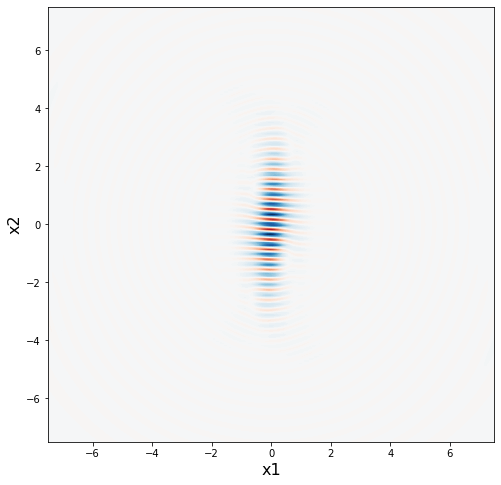

In [18]:
system.solve('adiabatic', 'puri', 0, 0, 20, 6000, 20)

In [ ]:
system.solve('adiabatic', 'Ex=3t', 0, 0.0001, 5, 500, 20)

In [84]:
system.solve('adiabatic', 'Ex=10t^2', 0, 0.0001, 10, 5000, 20)

In [95]:
system.solve('nonadiabatic', 'Ey=100', 0, 0.0001, 5, 500, 20)

C:\Users\kimje\AppData\Local\Temp\ipykernel_24328\2852437822.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_prime=0.5*(1/sqrt(4*(1-exp((-(t)**4)/(self.tau**4)))))*((-4)*exp((-(t)**4)/(self.tau**4)))*((-4)*(t**3)/(self.tau**4))
C:\Users\kimje\AppData\Local\Temp\ipykernel_24328\2852437822.py:20: RuntimeWarning: invalid value encountered in double_scalars
  alpha_prime=0.5*(1/sqrt(4*(1-exp((-(t)**4)/(self.tau**4)))))*((-4)*exp((-(t)**4)/(self.tau**4)))*((-4)*(t**3)/(self.tau**4))
C:\Users\kimje\AppData\Local\Temp\ipykernel_24328\2852437822.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  N_alpha=1/(sqrt(2*(1-exp((-2)*(Ep/self.chi)))))


In [73]:
cat=coherent(15,sqrt(4.8))+coherent(15,-1*sqrt(4.8))

In [75]:
result=mesolve(H_adiabatic, coherent(15,0),linspace(0,2,500),[],[])

In [80]:
t=result.states[499]
fidelity(cat, t)

0.007128563905758775

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

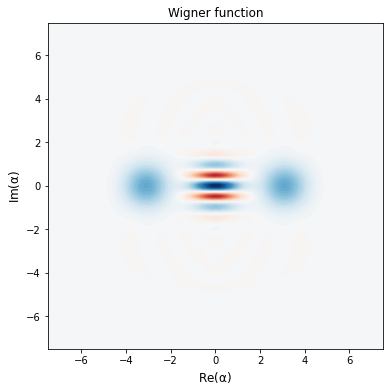

In [81]:
plot_wigner(cat)

In [74]:
N=15
a=destroy(N)
chi=-0.75*2*pi
Ep=3.7*2*pi 
H_=chi*a.dag()*a.dag()*a*a+Ep*(a.dag()*a.dag()+a*a)

tau=5/chi
def Epx(t, args):
    return 4*chi*(1-exp((-(t)**4)/(tau**4)))
def Epy(t,args):
    Ep= 4*chi*(1-exp((-(t)**4)/(tau**4)))
    alpha_0=sqrt(Ep/chi)
    alpha_prime=0.5*(1/sqrt(4*(1-exp((-(t)**4)/(tau**4)))))*((-4)*exp((-(t)**4)/(tau**4)))*((-4)*(t**3)/(tau**4))
    N_alpha=1/(sqrt(2*(1-exp((-2)*(Ep/chi)))))
    return (1j*alpha_prime)/((1+2*alpha_0)*(N_alpha))
H0=chi*a.dag()*a.dag()*a*a
H1=a.dag()*a.dag()+a*a
H2=a.dag()*a.dag()-a*a
H_adiabatic=[H0, [H1, Epx]]
H_NonAdia=[H0,[H1,Epx], [H2,Epy]]
test=[H0, [H2,Epy]]



In [8]:
def solve(H,spec, N, alpha, start, stop, num, speed):
    psi=coherent(N, alpha)
    tlist=linspace(start, stop, num)
    n=len(tlist)
    result=mesolve(H, psi, tlist, [], [])
    fig, ax= plt.subplots(1,1,figsize=(8,8))
    def update(frame):
        plot_wigner(result.states[frame*speed], fig=fig, ax=ax)
    ani=animation.FuncAnimation(fig, update, frames=int(n/speed))
    FFwriter=animation.FFMpegWriter()
    name=f"{spec},N={N},alpha={round(alpha,1)},t=({start},{stop},{num}).mp4"
    file_name=f"C:/Users/kimje/Desktop/Project/Posco/Cat/animation/{name}.mp4"
    ani.save(file_name, writer=FFwriter)
    plt.close()
    # ani.save(name , writer=FFwriter)

In [53]:
def solve_(H,spec,state, start, stop, num, speed):
    tlist=linspace(start, stop, num)
    n=len(tlist)
    result=mesolve(H, state, tlist, [], [])
    fig, ax= plt.subplots(1,1,figsize=(8,8))
    def update(frame):
        plot_wigner(result.states[frame*speed], fig=fig, ax=ax)
    ani=animation.FuncAnimation(fig, update, frames=int(n/speed))
    FFwriter=animation.FFMpegWriter()
    name=f"{spec},N={N},t=({start},{stop},{num}).mp4"
    file_name=f"C:/Users/kimje/Desktop/Project/Posco/Cat/animation/{name}.mp4"
    ani.save(file_name, writer=FFwriter)
    plt.close()
    # ani.save(name , writer=FFwriter)

In [56]:
solve_(H_adiabatic, 'one', basis(15,1),0,2,500,20)

In [57]:
solve_(H_adiabatic, 'zero', basis(15,0),0,2,500,20)

### adiabatic drive vs constant drive
- Kerr stregnth ~ time


In [15]:
solve(H_adiabatic, 'adiabatic', 15, 0,0, 26.67, 500 ,5)

In [16]:
solve(H_2p, '2p', 15, 0,0, 26.67, 500 ,5)

In [26]:
solve(H_adiabatic, '4K', 15, 0,0, 26.67, 500 ,5)

In [24]:
solve(H_adiabatic, '0.1K', 15, 0,0, 26.67, 500 ,5)

### nonadiabatic

In [52]:
solve(H_NonAdia, 'nonadia', 15, 0, 0.0001, 2, 500 ,5)

C:\Users\kimje\AppData\Local\Temp\ipykernel_15076\2635694210.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_prime=0.5*(1/sqrt(4*(1-exp((-(t)**4)/(tau**4)))))*((-4)*exp((-(t)**4)/(tau**4)))*((-4)*(t**3)/(tau**4))
C:\Users\kimje\AppData\Local\Temp\ipykernel_15076\2635694210.py:13: RuntimeWarning: invalid value encountered in double_scalars
  alpha_prime=0.5*(1/sqrt(4*(1-exp((-(t)**4)/(tau**4)))))*((-4)*exp((-(t)**4)/(tau**4)))*((-4)*(t**3)/(tau**4))
C:\Users\kimje\AppData\Local\Temp\ipykernel_15076\2635694210.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  N_alpha=1/(sqrt(2*(1-exp((-2)*(Ep/chi)))))


In [ ]:
solve(H_NonAdia, 'nonadia', 15, 0, 0.0001, 26.67, 500 ,5)

C:\Users\kimje\AppData\Local\Temp\ipykernel_15076\2635694210.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_prime=0.5*(1/sqrt(4*(1-exp((-(t)**4)/(tau**4)))))*((-4)*exp((-(t)**4)/(tau**4)))*((-4)*(t**3)/(tau**4))
C:\Users\kimje\AppData\Local\Temp\ipykernel_15076\2635694210.py:13: RuntimeWarning: invalid value encountered in double_scalars
  alpha_prime=0.5*(1/sqrt(4*(1-exp((-(t)**4)/(tau**4)))))*((-4)*exp((-(t)**4)/(tau**4)))*((-4)*(t**3)/(tau**4))
C:\Users\kimje\AppData\Local\Temp\ipykernel_15076\2635694210.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  N_alpha=1/(sqrt(2*(1-exp((-2)*(Ep/chi)))))


In [50]:
solve(test, 'test', 15, 0, 0.01, 26.67, 500 ,20)

C:\Users\kimje\AppData\Local\Temp\ipykernel_15076\2635694210.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_prime=0.5*(1/sqrt(4*(1-exp((-(t)**4)/(tau**4)))))*((-4)*exp((-(t)**4)/(tau**4)))*((-4)*(t**3)/(tau**4))
C:\Users\kimje\AppData\Local\Temp\ipykernel_15076\2635694210.py:13: RuntimeWarning: invalid value encountered in double_scalars
  alpha_prime=0.5*(1/sqrt(4*(1-exp((-(t)**4)/(tau**4)))))*((-4)*exp((-(t)**4)/(tau**4)))*((-4)*(t**3)/(tau**4))
C:\Users\kimje\AppData\Local\Temp\ipykernel_15076\2635694210.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  N_alpha=1/(sqrt(2*(1-exp((-2)*(Ep/chi)))))
